In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from WFC import WaveFunctionCollapse, WaveFunctionCollapseVisualizer
import rasterio
import seaborn as sns

from utils import visualize_3d_terrain, visualize_terrain
from functions import height_to_slopes, slopes_to_height

(100, 100)
/Users/parsa/Daneshgah/Arshad/Thesis/datasets/SRTM_IRAN/data/N26E057.hgt


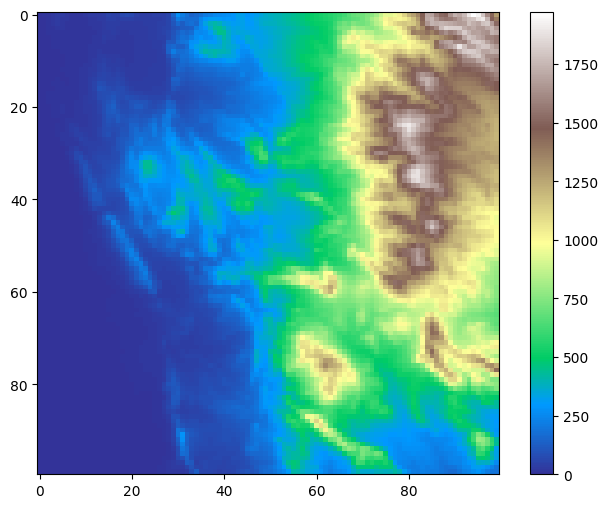

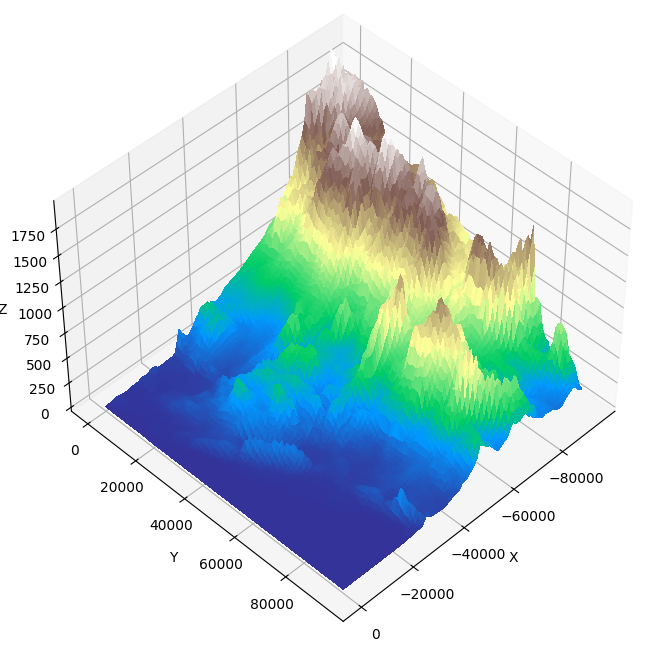

(0.0, 1971.0, 483.1044)

In [2]:
# dataset_dir = "/Users/parsa/Daneshgah/Arshad/Thesis/datasets/pappas_kaggle/archive"
# data_paths = sorted(glob.glob(os.path.join(dataset_dir, "*.png")))
# sample_data_path = data_paths[0]

# # Load the image
# sample_data = iio.imread(sample_data_path, mode='I')[400:500, 400:500]  # 'I' mode ensures reading as uint16
# print(sample_data.dtype)  # This should print 'uint16'

# # Load the image
# sample_data = cv2.imread(sample_data_path, cv2.IMREAD_UNCHANGED)
# print(sample_data.dtype)  # This should print 'uint16'

i = 15
dataset_dir = "/Users/parsa/Daneshgah/Arshad/Thesis/datasets/SRTM_IRAN/data/"
data_paths = sorted(glob.glob(os.path.join(dataset_dir, "*.hgt")))
sample_data_path = data_paths[i]

# with rasterio.open(sample_data_path) as src:
#     sample_data = src.read(1)[2500:3000, 1500:2000].astype(float)  # Read the first (and only) band
#     profile = src.profile  # Get metadata such as CRS, transform, etc.

scale_factor = 1/32


with rasterio.open(sample_data_path) as src:
    # Define the desired smaller shape (for example, half the original size)
    new_height = int(src.height * scale_factor)
    new_width = int(src.width * scale_factor)

    # Read and resample the data to the new shape
    sample_data = src.read(
        1,  # First band
        out_shape=(new_height, new_width),
        resampling=rasterio.enums.Resampling.bilinear  # Choose the resampling method
    ).astype(float)[:100, :100]
    


# sample_data = np.array([
#     [0, 1, 3, 10, 15, 9],
#     [2, 4, 3, 8, 13, 10],
#     [3, 1, 7, 7, 12, 9],
#     [4, 2, 6, 10, 13, 11],
#     [6, 1, 8, 9, 15, 7],
#     [6, 3, 2, 5, 4, 2,]]
# )

print(sample_data.shape)


print(sample_data_path)
visualize_terrain(sample_data)
visualize_3d_terrain(sample_data, sampling_scale_factor=scale_factor)
# sns.heatmap(sample_data, annot=True, cmap='terrain')
sample_data.min(), sample_data.max(), sample_data.mean()

In [3]:

# wfc = WaveFunctionCollapse(sample_data, pattern_size=2, grid_size=(20,20), wrap_input=False)
# output_image = wfc.run()

sample_data.shape

(100, 100)

In [4]:
grad_x, grad_y = height_to_slopes(sample_data)
grad_x.shape, grad_y.shape

((100, 99), (99, 100))

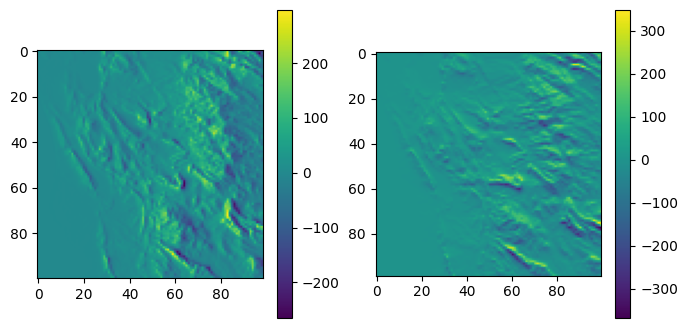

In [5]:
fix, axes = plt.subplots(1, 2, figsize=(8,4))
im1 = axes[0].imshow(grad_x)#, cmap='terrain')
im2 = axes[1].imshow(grad_y)#, cmap='terrain')
# im3 = axes[2].imshow(np.sqrt(grad_x[:-1,...]**2 + grad_y[...,:-1]**2).astype(int))
fix.colorbar(im1, ax=axes[0])
fix.colorbar(im2, ax=axes[1])
# fix.colorbar(im3, ax=axes[2])

# im1 = sns.heatmap(grad_x, ax=axes[0], annot=True)
# im2 = sns.heatmap(grad_y, ax=axes[1], annot=True)
# im3 = sns.heatmap(sample_data, ax=axes[2], annot=True)



In [6]:


hh = slopes_to_height(grad_x, grad_y)
print(np.unique(hh-sample_data))
print(len(np.unique(hh-sample_data)) == 1)
# fix, axes = plt.subplots(1, 2, figsize=(8,4))
# im1 = sns.heatmap(hh, ax=axes[0], annot=True)
# im2 = sns.heatmap(sample_data2, ax=axes[1], annot=True)

# visualize_terrain(hh)
# visualize_3d_terrain(hh)

[-7.]
True


In [7]:
slopes = np.concatenate([grad_x[:-1, ..., np.newaxis], grad_y[..., :-1, np.newaxis]], axis=2)
slopes.shape

(99, 99, 2)

In [9]:
wfc_terrain = WaveFunctionCollapse(slopes, (2,2,2), (100,100))


Matching Patterns: 100%|██████████| 101/101 [00:00<00:00, 823.34it/s]


In [10]:
paa = list(wfc_terrain.patterns)
len(paa)

101

In [14]:
vis = WaveFunctionCollapseVisualizer((100,1000), [], wfc_terrain.pattern_to_number, (2,2,2), wfc_terrain.adjacency_rules)

In [15]:
vis.visualize_adjacency(paa[0])

TypeError: return arrays must be of ArrayType

In [12]:
len(wfc_terrain.observations)

0

In [ ]:
output_image = wfc_terrain.run()


Observation number 2: 100%|██████████| 100/100 [00:01<00:00, 75.83it/s]


No Solution Found, Retrying...


Initializing Grid:  36%|███▌      | 36/100 [00:04<00:19,  3.23it/s]

KeyboardInterrupt: 

Initializing Grid:  36%|███▌      | 36/100 [00:21<00:19,  3.23it/s]